In [217]:
%load_ext autoreload
%autoreload 2

import logging

import anndata as ad
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from alphatools.pl import colors
from alphatools.pl.colors import show_rgba_color_list
from alphatools.pl.figure import create_figure, label_axes, save_figure
from alphatools.pl.plots import Plots

logging.basicConfig(level=logging.INFO)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Basic colors, palettes and color maps for AlphaTools

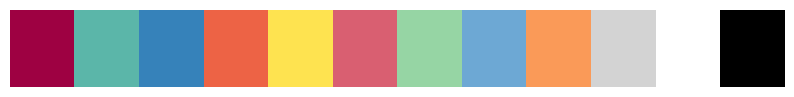

In [218]:
# colors, derived from the basic palette
base_colors = [
    "red",
    "green",
    "blue",
    "orange",
    "yellow",
    "lightred",
    "lightgreen",
    "lightblue",
    "lightorange",
    "grey",
    "white",
    "black",
]
show_rgba_color_list([colors.BaseColors.get(base_color) for base_color in base_colors])

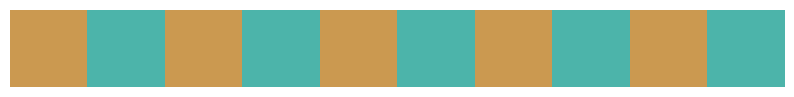

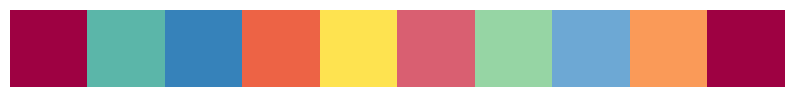

In [219]:
# color palettes
palettes = ["binary", "qualitative"]
for palette in palettes:
    show_rgba_color_list(colors.BasePalettes.get(palette))

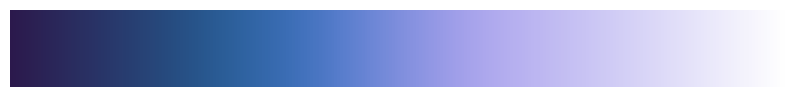

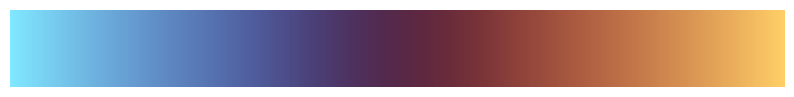

In [220]:
# colormaps
maps = ["sequential", "diverging"]
for cmap in maps:
    show_rgba_color_list(list(colors.BaseColormaps.get(cmap)(np.arange(0, 1, 0.001))))

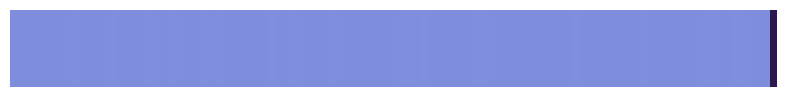

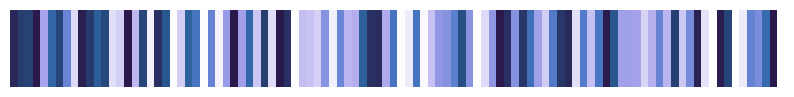

In [221]:
test_data = [*list(np.random.rand(100)), -100, 100]

# map colormaps to numerical values without capping
mapped_colors = colors.MappedColormaps(
    cmap="sequential",
    percentile=None,
).fit_transform(test_data)
show_rgba_color_list(mapped_colors)

# map colormaps to numerical values with capping
mapped_colors = colors.MappedColormaps(cmap="sequential", percentile=(5, 95)).fit_transform(data=test_data)
show_rgba_color_list(mapped_colors)

## Demonstrate at_figure.py submodule style & label handling

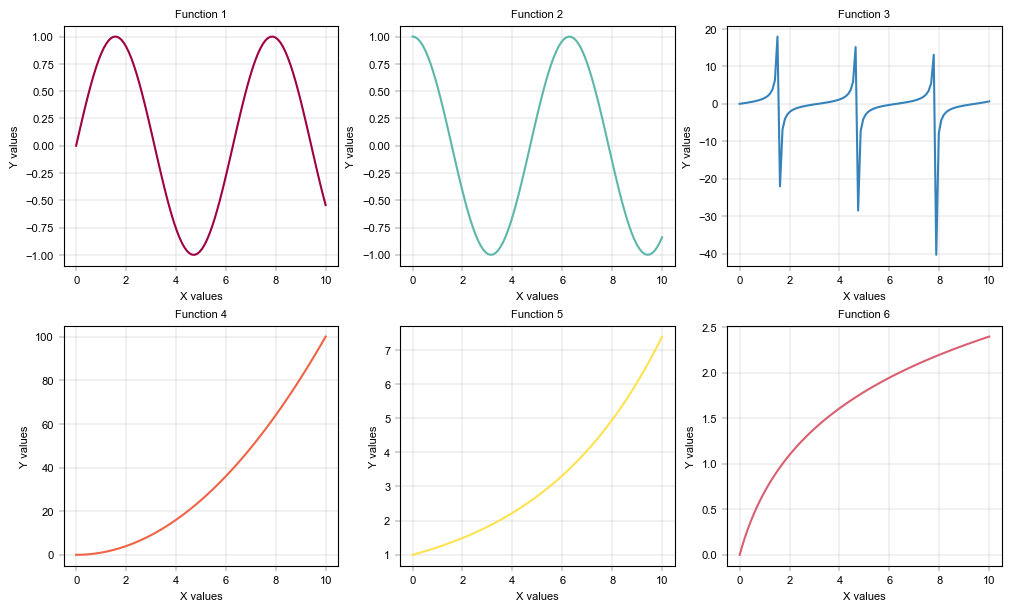

In [222]:
import numpy as np

# Create a 2x3 grid of subplots. Return an instance of AxisManager
fig, axm = create_figure(nrows=2, ncols=3, figsize=(10, 6))

# Example dataset
x = np.linspace(0, 10, 100)
y_funcs = [
    lambda x: np.sin(x),
    lambda x: np.cos(x),
    lambda x: np.tan(x),
    lambda x: x**2,
    lambda x: np.exp(x / 5),
    lambda x: np.log(x + 1),
]

# Get qualitative palette
palette = colors.BasePalettes.get("qualitative", len(y_funcs))

# Iterate through all axes using next() and plot different functions
try:
    for i, func in enumerate(y_funcs):
        ax = axm.next()
        ax.plot(x, func(x), color=palette[i])
        label_axes(ax, xlabel="X values", ylabel="Y values", title=f"Function {i + 1}")
except StopIteration:
    pass

plt.show()

# Save the figure
save_figure(
    fig=fig,
    filename="example_figure.png",
    output_dir="./example_outputs",
    dpi=300,
    transparent=False,
)

## Example data

In [223]:
example_df = pd.DataFrame(
    {
        "values": np.concatenate([np.random.normal(i, size=200) + np.random.normal(i) for i in range(3)]),
        "values2": np.concatenate([np.random.normal(i, size=200) + np.random.normal(i) for i in range(3)]),
        "levels": [i for i in range(3) for _ in range(200)],
        "levels2": np.arange(0, 600),
    }
)
example_df.index = example_df.index.astype(str)

example_adata = ad.AnnData(
    X=example_df[["values", "values2"]].values,
    obs=example_df[["levels", "levels2"]],
    var=example_df[["values", "values2"]].columns.to_frame(),
)

## Basic histogram with dataframe and AnnData

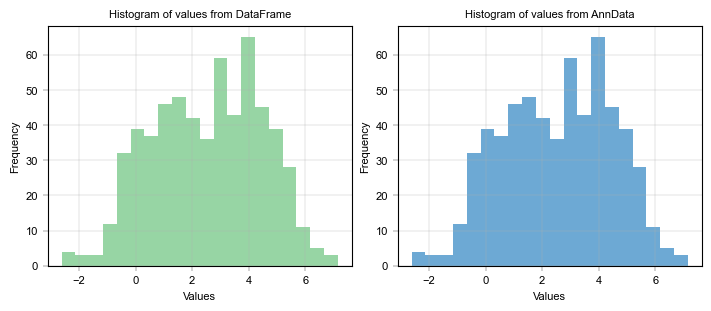

In [224]:
# with one color
fig, axm = create_figure(1, 2, figsize=(7, 3))

# Show histogram based on DataFrame
ax = axm.next()
Plots.histogram(
    data=example_df,
    value_column="values",
    bins=20,
    color="lightgreen",
    ax=ax,
)
label_axes(ax, xlabel="Values", ylabel="Frequency", title="Histogram of values from DataFrame")

# Show histogram based on AnnData
ax = axm.next()
Plots.histogram(
    data=example_adata,
    value_column="values",
    bins=20,
    color="lightblue",
    ax=ax,
)
label_axes(ax, xlabel="Values", ylabel="Frequency", title="Histogram of values from AnnData")

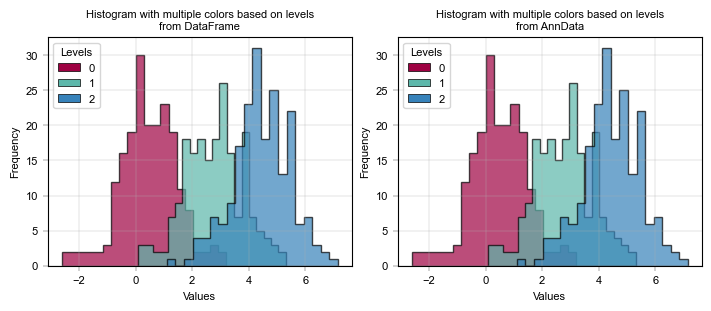

In [225]:
# with multiple colors based on levels
fig, axm = create_figure(1, 2, figsize=(7, 3))

# Show histogram based on DataFrame
ax = axm.next()
palette = colors.BasePalettes.get("qualitative", example_df["levels"].nunique())
Plots.histogram(
    data=example_df,
    value_column="values",
    color_column="levels",
    palette=palette,
    bins=20,
    ax=ax,
    legend="auto",
    hist_kwargs={"alpha": 0.7, "histtype": "stepfilled", "edgecolor": "k"},
    legend_kwargs={"title": "Levels", "loc": "upper left"},
)
label_axes(
    ax, xlabel="Values", ylabel="Frequency", title="Histogram with multiple colors based on levels\nfrom DataFrame"
)

# Show histogram based on AnnData
ax = axm.next()
palette = colors.BasePalettes.get("qualitative", example_adata.obs["levels"].nunique())
Plots.histogram(
    data=example_adata,
    value_column="values",
    color_column="levels",
    palette=palette,
    bins=20,
    ax=ax,
    legend="auto",
    hist_kwargs={"alpha": 0.7, "histtype": "stepfilled", "edgecolor": "k"},
    legend_kwargs={"title": "Levels", "loc": "upper left"},
)
label_axes(
    ax, xlabel="Values", ylabel="Frequency", title="Histogram with multiple colors based on levels\nfrom AnnData"
)

# Save the figure
save_figure(
    fig=fig,
    filename="example_histogram.png",
    output_dir="./example_outputs",
    dpi=300,
    transparent=False,
)

## Basic Scatterplot with DataFrame and AnnData

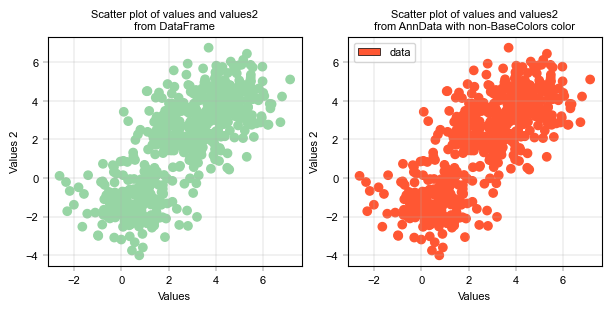

In [226]:
fig, axm = create_figure(1, 2, figsize=(6, 3))

# Scatterplot based on DataFrame
ax = axm.next()
Plots.scatter(
    data=example_adata,
    x_column="values",
    y_column="values2",
    color="lightgreen",
    ax=ax,
)

label_axes(ax, xlabel="Values", ylabel="Values 2", title="Scatter plot of values and values2\nfrom DataFrame")

# Scatterplot based on AnnData
ax = axm.next()
Plots.scatter(
    data=example_adata,
    x_column="values",
    y_column="values2",
    color="#FF5733",  # Some different color that is not in AlphaTools' BaseColors
    ax=ax,
    legend="auto",  # Automatically create a legend
)

label_axes(
    ax,
    xlabel="Values",
    ylabel="Values 2",
    title="Scatter plot of values and values2\nfrom AnnData with non-BaseColors color",
)

### Conveniently plot multiple levels in one scatterplot

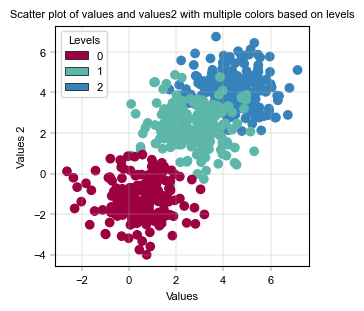

In [227]:
# with multiple colors based on levels
fig, axm = create_figure(figsize=(3, 3))
ax = axm.next()

Plots.scatter(
    data=example_adata,
    x_column="values",
    y_column="values2",
    color_column="levels",
    ax=ax,
    legend="auto",
    palette=None,
    legend_kwargs={"title": "Levels", "loc": "upper left"},
)

label_axes(
    ax,
    xlabel="Values",
    ylabel="Values 2",
    title="Scatter plot of values and values2 with multiple colors based on levels",
)
plt.show()

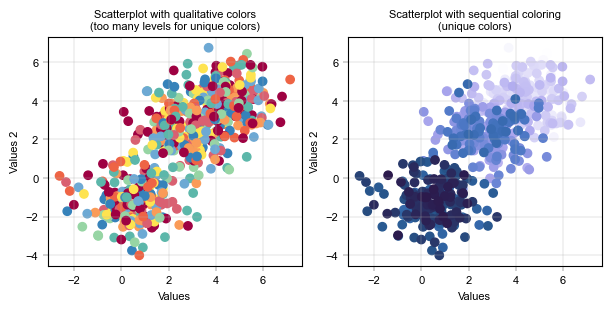

In [228]:
# with a large number of levels and automatic shift to squential coloring
fig, axm = create_figure(1, 2, figsize=(6, 3))
ax = axm.next()

Plots.scatter(
    data=example_df,
    x_column="values",
    y_column="values2",
    color_column="levels2",
    ax=ax,
)

label_axes(
    ax,
    xlabel="Values",
    ylabel="Values 2",
    title="Scatterplot with qualitative colors\n(too many levels for unique colors)",
)

ax = axm.next()

Plots.scatter(
    data=example_adata,
    x_column="values",
    y_column="values2",
    color_column="levels2",
    ax=ax,
    palette=colors.BaseColormaps.get("sequential"),
)

label_axes(
    ax,
    xlabel="Values",
    ylabel="Values 2",
    title="Scatterplot with sequential coloring\n(unique colors)",
)
plt.show()

## Volcanoplot

Visualize differential expression analyses

In [285]:
# example data, should be replaced by actual differential expression results from example file
testx = np.random.normal(0, 1, 300)
testy = -np.cos(testx) + np.random.normal(0, 0.2, 300)
testp = 10 ** -(testy - min(testy))

vp_data = pd.DataFrame(
    {
        "id": [f"P{10000 + i}" for i in range(300)],
        "gene": [f"gene_{i}" for i in range(300)],
        "log2fc": testx,
        "pval": testp,
    }
)

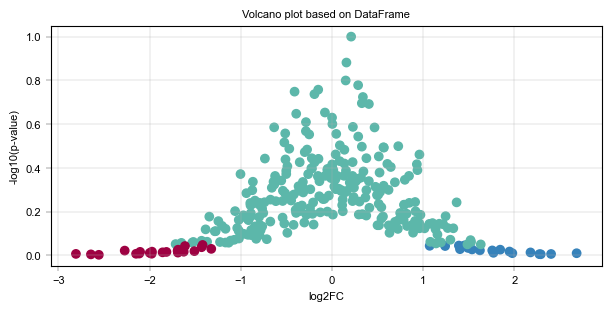

In [295]:
fig, axm = create_figure(1, 1, figsize=(6, 3))

# Volcano plot based on DataFrame
ax = axm.next()
Plots.volcanoplot(
    ax=ax,
    data=vp_data,
    x_column="log2fc",
    y_column="pval",
    neg_log10_y_column=True,
)

label_axes(ax, xlabel="log2FC", ylabel="-log10(p-value)", title="Volcano plot based on DataFrame")

# # Volcano plot based on AnnData
# ax = axm.next()
# Plots.volcanoplot(
#     data=ad.AnnData(vp_data),
#     x_column="log2fc",
#     y_column="pval",
#     neg_log10_y_column=True,
# )